## Paulista Football Championship - Average Goals Analysis

The datasets used in this notebook refer to the 'Campeonato Paulista de Futebol' (Paulista Football Championship), which is the São Paulo State Football League for the 2016-2019 period.

Data was scrapped from the site into `.xlsx` files and than treated with pandas library.

Analysis of Average Goals for the first 12 rounds of the championship are explored.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def sort_df(name):
    tab = pd.read_excel(name,usecols = [0,2,3,4],names=['Rodada','Team_1','Team_2','Score'])
    
    tab['Rodada'][0] = 'Rodada 12'
    tab['Rodada'].fillna(method='ffill',inplace=True)
    
    tab.dropna(axis=0,inplace=True)
    
    tab['Team_1_Score'] = tab['Score'].astype(str).str.split(':').str[0].astype(int)
    tab['Team_2_Score'] = tab['Score'].astype(str).str.split(':').str[1].astype(int)
    del tab['Score']
    
    return tab

def avg_round(team,df):
    
    avg = df[(df['Team_1'] == team) | (df['Team_2'] == team)]

    goals = avg[avg['Team_1'] == team]['Team_1_Score']
    goals = goals.append(avg[avg['Team_2'] == team]['Team_2_Score'])
    
    return goals.mean()

def score(team,df):
    
    avg = df[(df['Team_1'] == team) | (df['Team_2'] == team)]

    goals = avg[avg['Team_1'] == team]['Team_1_Score']
    goals = goals.append(avg[avg['Team_2'] == team]['Team_2_Score'])
    
    return goals

#In case we would work with the dates
datas = [x for x,_ in tab['Data'].str.split('. ')]
tab['Data'] = datas
pd.to_datetime(arg = tab['Data'],format='%d.%m')

In [4]:
tab_16 = sort_df('tab_2016.xlsx')
tab_17 = sort_df('tab_2017.xlsx')
tab_18 = sort_df('tab_2018.xlsx')
tab_19 = sort_df('tab_2019.xlsx')

In [5]:
SP = [avg_round('São Paulo',tab_16),avg_round('São Paulo',tab_17),avg_round('São Paulo',tab_18),avg_round('São Paulo',tab_19)]
CO = [avg_round('Corinthians',tab_16),avg_round('Corinthians',tab_17),avg_round('Corinthians',tab_18),avg_round('Corinthians',tab_19)]
PAL = [avg_round('Palmeiras',tab_16),avg_round('Palmeiras',tab_17),avg_round('Palmeiras',tab_18),avg_round('Palmeiras',tab_19)]
STS = [avg_round('Santos',tab_16),avg_round('Santos',tab_17),avg_round('Santos',tab_18),avg_round('Santos',tab_19)]

In [6]:
t_16 = score('Santos',tab_16)#.append([score('Corinthians',tab_16),score('Palmeiras',tab_16),score('Santos',tab_16),score('Ponte Preta',tab_16)])
t_17 = score('Corinthians',tab_17)
t_18 = score('Corinthians',tab_18)
t_19 = score('Corinthians',tab_19)
data_1 = np.array(t_16),np.array(t_17), np.array(t_18),np.array(t_19)

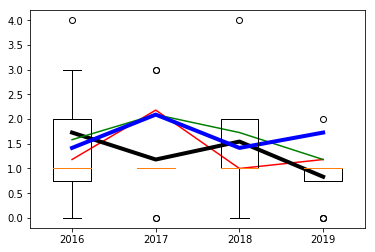

In [7]:
plt.plot(SP,c='red') #média de gols por time ao longo das 12 primeiras rodadas para cada um dos três anos
plt.gca().plot(CO,c='black',linewidth=4)
plt.gca().plot(PAL,c='green')
plt.gca().plot(STS,'blue',linewidth=4)
#plt.gca().plot(PTP,'grey')# mas PTP é do troféu do interior
plt.gca().boxplot(data_1,positions=[0,1,2,3]);
plt.xticks(ticks=[0,1,2,3],labels=['2016','2017','2018','2019']);

#One intersting aspect is that 'Corinthians' was the champion in this season although its average goals in usually below the rest in the first 12 rounds



__Exploring average goals by round for every game there was a specific team involved.__

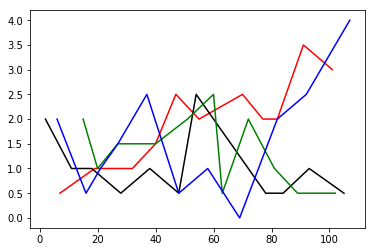

In [8]:
tab_17[(tab_17['Team_1']== 'São Paulo') | (tab_17['Team_2']== 'São Paulo')].mean(axis=1).plot(c='red')
tab_17[(tab_17['Team_1']== 'Corinthians') | (tab_17['Team_2']== 'Corinthians')].mean(axis=1).plot(c='black')
tab_17[(tab_17['Team_1']== 'Palmeiras') | (tab_17['Team_2']== 'Palmeiras')].mean(axis=1).plot(c='green')
tab_17[(tab_17['Team_1']== 'Santos') | (tab_17['Team_2']== 'Santos')].mean(axis=1).plot(c='blue')

# References

https://www.resultados.com/futebol/brasil/campeonato-paulista-2019/resultados/

https://www.resultados.com/futebol/brasil/campeonato-paulista-2018/resultados/

https://www.resultados.com/futebol/brasil/campeonato-paulista-2017/resultados/

https://www.resultados.com/futebol/brasil/campeonato-paulista/arquivo/